## Importing libaries

In [22]:
import pandas as pd

from sklearn import preprocessing 
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import os
os.chdir('../Preprocessing')
from normalization import normalize_corpus


## Reading the data

In [8]:
df = pd.read_csv('../Data_collection/dataset.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28518 entries, 0 to 28517
Data columns (total 5 columns):
Unnamed: 0    28518 non-null int64
URL           28518 non-null object
CATEGORY      28518 non-null object
CONTENT       28518 non-null object
SUMMARY       28518 non-null object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


## Data Exploration

## Normalizing the data

#### The implementation of this is available under normalization.py located in preprocessing folder

In [9]:
df['FILTERED_CONTENT'] = df['CONTENT'].apply(normalize_corpus)

df.head()

,Unnamed: 0,URL,CATEGORY,CONTENT,SUMMARY,FILTERED_CONTENT
0,1,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,business,Paris/London/Atlanta: Federal Reserve Bank of ...,Paris/London/Atlanta: Federal Reserve Bank of ...,federal reserve bank philadelphia president ch...
1,4,http://www.moneynews.com/Economy/federal-reser...,business,Severe winter weather likely affected U.S. job...,Severe winter weather likely affected U.S. job...,severe winter weather likely affected job grow...
2,6,http://www.marketwatch.com/story/feds-plosser-...,business,PARISn — The Federal Reserve may have to accel...,“We must back away from increasing the degree ...,parisn the federal reserve may accelerate pace...
3,7,http://www.fxstreet.com/news/forex-news/articl...,business,FXStreet (Łódź) - Philadelphia Fed President C...,FXStreet (Łódź) - Philadelphia Fed President C...,fxstreet łódź philadelphia fed president charl...
4,9,http://www.iii.co.uk/news-opinion/reuters/news...,business,The value of international investments may be ...,The value of international investments may be ...,the value international investment may affect ...


Text(0.5, 1.0, 'Before sampling')

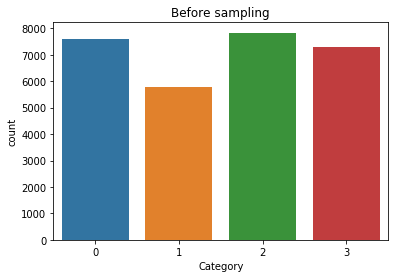

In [10]:
# Encode labels in column 'category'.
label_encoder = preprocessing.LabelEncoder() 
df['CATEGORY']= label_encoder.fit_transform(df['CATEGORY']) 

sns.countplot(df.CATEGORY)
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Before sampling')

Text(0.5, 1.0, 'After sampling')

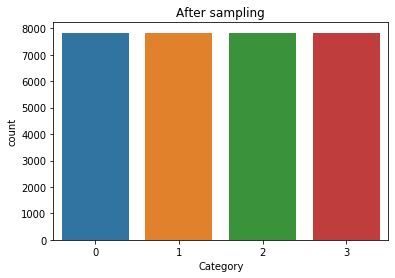

In [11]:
#Sampling the data

df0 = df[df.CATEGORY==0]
df1 = df[df.CATEGORY==1]
df2 = df[df.CATEGORY==2]
df3 = df[df.CATEGORY==3]

samples = df.CATEGORY.value_counts().tolist()



df0 = resample(df0, 
                   replace=True,   
                   n_samples=samples[0], 
                   random_state=1130)
df1 = resample(df1, 
                   replace=True,    
                   n_samples=samples[0],
                   random_state=123)
df2 = resample(df2, 
                   replace=True,    
                   n_samples=samples[0],
                   random_state=123)
df3 = resample(df3, 
                   replace=True,    
                   n_samples=samples[0],
                   random_state=123)


df_sampled = pd.concat([df0,df1,df2,df3])

df= df_sampled



sns.countplot(df_sampled.CATEGORY)
plt.xlabel('Category')
plt.ylabel('count')
plt.title('After sampling')

## Feature Extraction using Bag of words

In [13]:
training_set, test_set, training_labels, test_labels = train_test_split(df["FILTERED_CONTENT"], df["CATEGORY"], test_size=0.33, random_state=42)

In [14]:
#Bag of words
vectorizer = CountVectorizer(min_df =2, ngram_range=(2,2))
bow_train_features = vectorizer.fit_transform(training_set)
bow_test_features = vectorizer.transform(test_set)

#### Classification using Bag of words features

C:\Users\Hetal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hetal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression using Bag of words

Accuracy:  95.37851687131393 

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2578
           1       0.96      0.98      0.97      2627
           2       0.96      0.94      0.95      2545
           3       0.96      0.94      0.95      2593

    accuracy                           0.95     10343
   macro avg       0.95      0.95      0.95     10343
weighted avg       0.95      0.95      0.95     10343



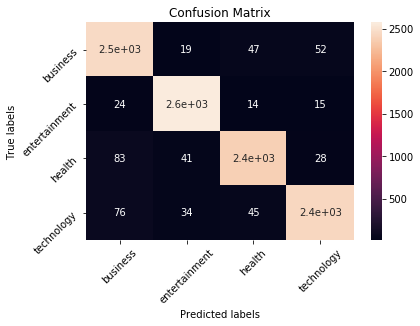

In [28]:
#Logistic Regression

logRegModel = LogisticRegression()
logRegModel.fit(bow_train_features,training_labels)

predictions_lr = logRegModel.predict(bow_test_features)

print("Logistic Regression using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_lr, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_lr))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_lr)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


MultiNomial Naive Bayes using Bag of words

Accuracy:  94.36333752296238 

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2578
           1       0.95      0.98      0.96      2627
           2       0.96      0.92      0.94      2545
           3       0.94      0.94      0.94      2593

    accuracy                           0.94     10343
   macro avg       0.94      0.94      0.94     10343
weighted avg       0.94      0.94      0.94     10343



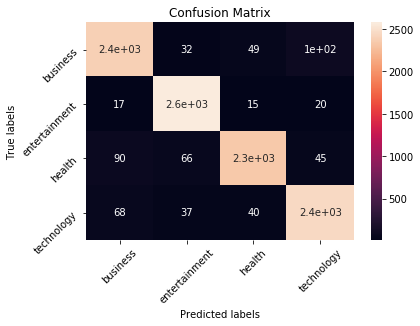

In [16]:
#Naive Bayes
mnb = MultinomialNB()
mnb.fit(bow_train_features,training_labels)

predictions_mnb = mnb.predict(bow_test_features)

print("MultiNomial Naive Bayes using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_mnb, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_mnb))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_mnb)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


Random Forest using Bag of words

Accuracy:  92.74871894034614 

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2578
           1       0.95      0.97      0.96      2627
           2       0.91      0.92      0.92      2545
           3       0.95      0.89      0.92      2593

    accuracy                           0.93     10343
   macro avg       0.93      0.93      0.93     10343
weighted avg       0.93      0.93      0.93     10343



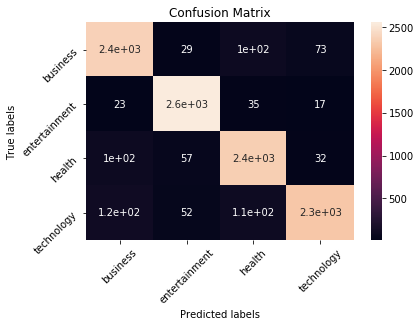

In [23]:
#Random Forest
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(bow_train_features,training_labels)

predictions_rfc = rfc.predict(bow_test_features)

print("Random Forest using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_rfc, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_rfc))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_rfc)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

Support Vector Machine using Bag of words

Accuracy:  94.9627767572271 

Classification Report

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2578
           1       0.97      0.98      0.97      2627
           2       0.94      0.94      0.94      2545
           3       0.96      0.93      0.95      2593

    accuracy                           0.95     10343
   macro avg       0.95      0.95      0.95     10343
weighted avg       0.95      0.95      0.95     10343



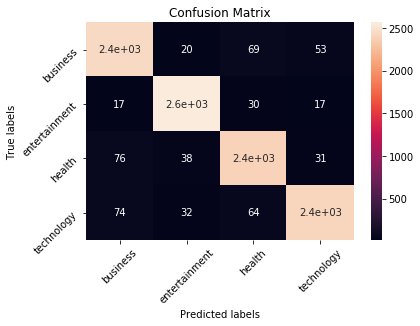

In [17]:
#Support Vector Machines

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(bow_train_features,training_labels)

predictions_SVM = SVM.predict(bow_test_features)

print("Support Vector Machine using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_SVM, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_SVM))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_SVM)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


## Feature Extractiong using TF-IDF vector

In [26]:
#Tfidf 
tfidvectorizer = TfidfVectorizer(min_df=2, 
                                 ngram_range=(2,2),
                                 smooth_idf=True,
                                 use_idf=True)
tfid_train_features = tfidvectorizer.fit_transform(training_set)

tfid_test_features = tfidvectorizer.transform(test_set)

#### Classification using TF-IDF features

C:\Users\Hetal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hetal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression using TF-IDF

Accuracy:  94.69206226433336 

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2578
           1       0.95      0.98      0.97      2627
           2       0.96      0.92      0.94      2545
           3       0.94      0.94      0.94      2593

    accuracy                           0.95     10343
   macro avg       0.95      0.95      0.95     10343
weighted avg       0.95      0.95      0.95     10343



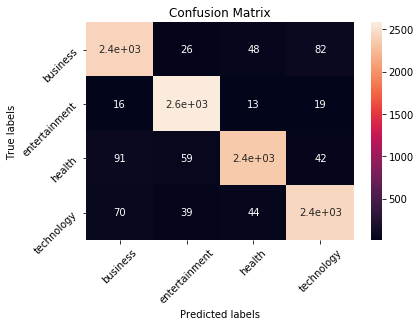

In [19]:
logRegModel = LogisticRegression()
logRegModel.fit(tfid_train_features,training_labels)

predictions_lr = logRegModel.predict(tfid_test_features)
score_lr = logRegModel.score(tfid_test_features,test_labels)

print("Logistic Regression using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_lr, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_lr))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_lr)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


MultiNomial Naive Bayes using TF-IDF

Accuracy:  93.58019916851977 

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2578
           1       0.95      0.98      0.96      2627
           2       0.96      0.92      0.94      2545
           3       0.92      0.93      0.93      2593

    accuracy                           0.94     10343
   macro avg       0.94      0.94      0.94     10343
weighted avg       0.94      0.94      0.94     10343



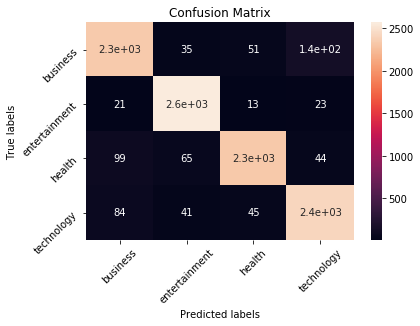

In [25]:
#Naive Bayes
mnb = MultinomialNB()

mnb.fit(tfid_train_features,training_labels)

predictions_mnb = mnb.predict(tfid_test_features)

print("MultiNomial Naive Bayes using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_mnb, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_mnb))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_mnb)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);


Random Forest using TF-IDF

Accuracy:  92.51667794643721 

Classification Report

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2578
           1       0.95      0.96      0.96      2627
           2       0.94      0.91      0.93      2545
           3       0.95      0.89      0.92      2593

    accuracy                           0.93     10343
   macro avg       0.93      0.93      0.93     10343
weighted avg       0.93      0.93      0.93     10343



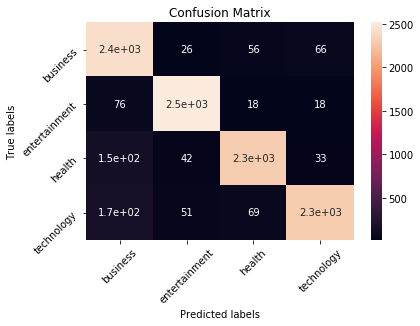

In [27]:
#Random Forest
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(tfid_train_features,training_labels)

predictions_rfc = rfc.predict(tfid_test_features)

print("Random Forest using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_rfc, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_rfc))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_rfc)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

Support Vector Machine using IF-IDF

Accuracy:  95.27216474910567 

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2578
           1       0.97      0.98      0.97      2627
           2       0.96      0.94      0.95      2545
           3       0.95      0.94      0.95      2593

    accuracy                           0.95     10343
   macro avg       0.95      0.95      0.95     10343
weighted avg       0.95      0.95      0.95     10343



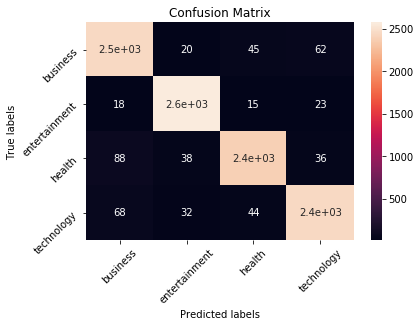

In [21]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tfid_train_features,training_labels)

predictions_SVM = SVM.predict(tfid_test_features)


print("Support Vector Machine using IF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_SVM, test_labels)*100,"\n")

print("Classification Report\n")
print(classification_report(test_labels,predictions_SVM))


#Plotting the confusion matrix
cm = confusion_matrix(test_labels, predictions_SVM)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45); 
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);
